In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot  as plt
import os
import itertools
%matplotlib inline
import sys
import gc

In [251]:
#the data which I am gong to use are very big data and take lot os memory space.
#so I will use reduce function to reduce the size of data
#used this code from Kaggel
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            #else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                   # df[col] = df[col].astype(np.float16)
                #elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    #df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df



In [252]:
data_ride=pd.read_csv('C:/Users/abhak/Documents/cab_ride_price/cab_ridespred.csv')
data_ride=reduce_mem_usage(data_ride)
data=pd.read_csv('C:/Users/abhak/Documents/cab_ride_price/weather.csv')
data=reduce_mem_usage(data)


Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 52.88 MB
Decreased by 0.0%
Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.36 MB
Decreased by 6.2%


In [253]:
data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [254]:
data.shape

(6276, 8)

In [255]:
data_ride.shape

(693071, 10)

In [256]:
data_ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [257]:
data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [258]:
data_ride['dateTime']=pd.to_datetime(data_ride['time_stamp'])
data_ride.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,dateTime
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223


In [259]:
data['date_Time']=pd.to_datetime(data['time_stamp'])
data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,1970-01-01 00:00:01.545003901
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,1970-01-01 00:00:01.545003901
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,1970-01-01 00:00:01.545003901
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,1970-01-01 00:00:01.545003901
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,1970-01-01 00:00:01.545003901


In [260]:
data_ride.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'dateTime'],
      dtype='object')

In [261]:
data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [262]:
data_ride.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [263]:
a=pd.concat([data_ride,data], axis=1)
a.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,dateTime,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,42.42,Back Bay,1.0,1012.14,0.1228,1.545004e+09,0.77,11.25,1970-01-01 00:00:01.545003901
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,42.43,Beacon Hill,1.0,1012.15,0.1846,1.545004e+09,0.76,11.32,1970-01-01 00:00:01.545003901
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,42.50,Boston University,1.0,1012.15,0.1089,1.545004e+09,0.76,11.07,1970-01-01 00:00:01.545003901


In [264]:
import datetime
a['day']= a.date_Time.dt.day
a['Hour']=a.date_Time.dt.hour
a.head(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time,day,Hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Back Bay,1.0,1012.14,0.1228,1.545004e+09,0.77,11.25,1970-01-01 00:00:01.545003901,1.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,Beacon Hill,1.0,1012.15,0.1846,1.545004e+09,0.76,11.32,1970-01-01 00:00:01.545003901,1.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,Boston University,1.0,1012.15,0.1089,1.545004e+09,0.76,11.07,1970-01-01 00:00:01.545003901,1.0,0.0


In [265]:
a.tail(3)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time,day,Hour
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [266]:
a.fillna(0, inplace=True)

In [267]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time,day,Hour
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
693068,1.0,Uber,1543708385534,North End,West End,0.0,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [268]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'dateTime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity',
       'wind', 'date_Time', 'day', 'Hour'],
      dtype='object')

In [269]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,dateTime,...,location,clouds,pressure,rain,time_stamp,humidity,wind,date_Time,day,Hour
cab_type,,,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,...,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,...,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


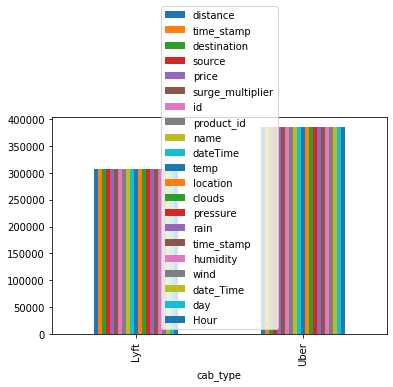

In [270]:
a.groupby('cab_type').count().plot.bar()

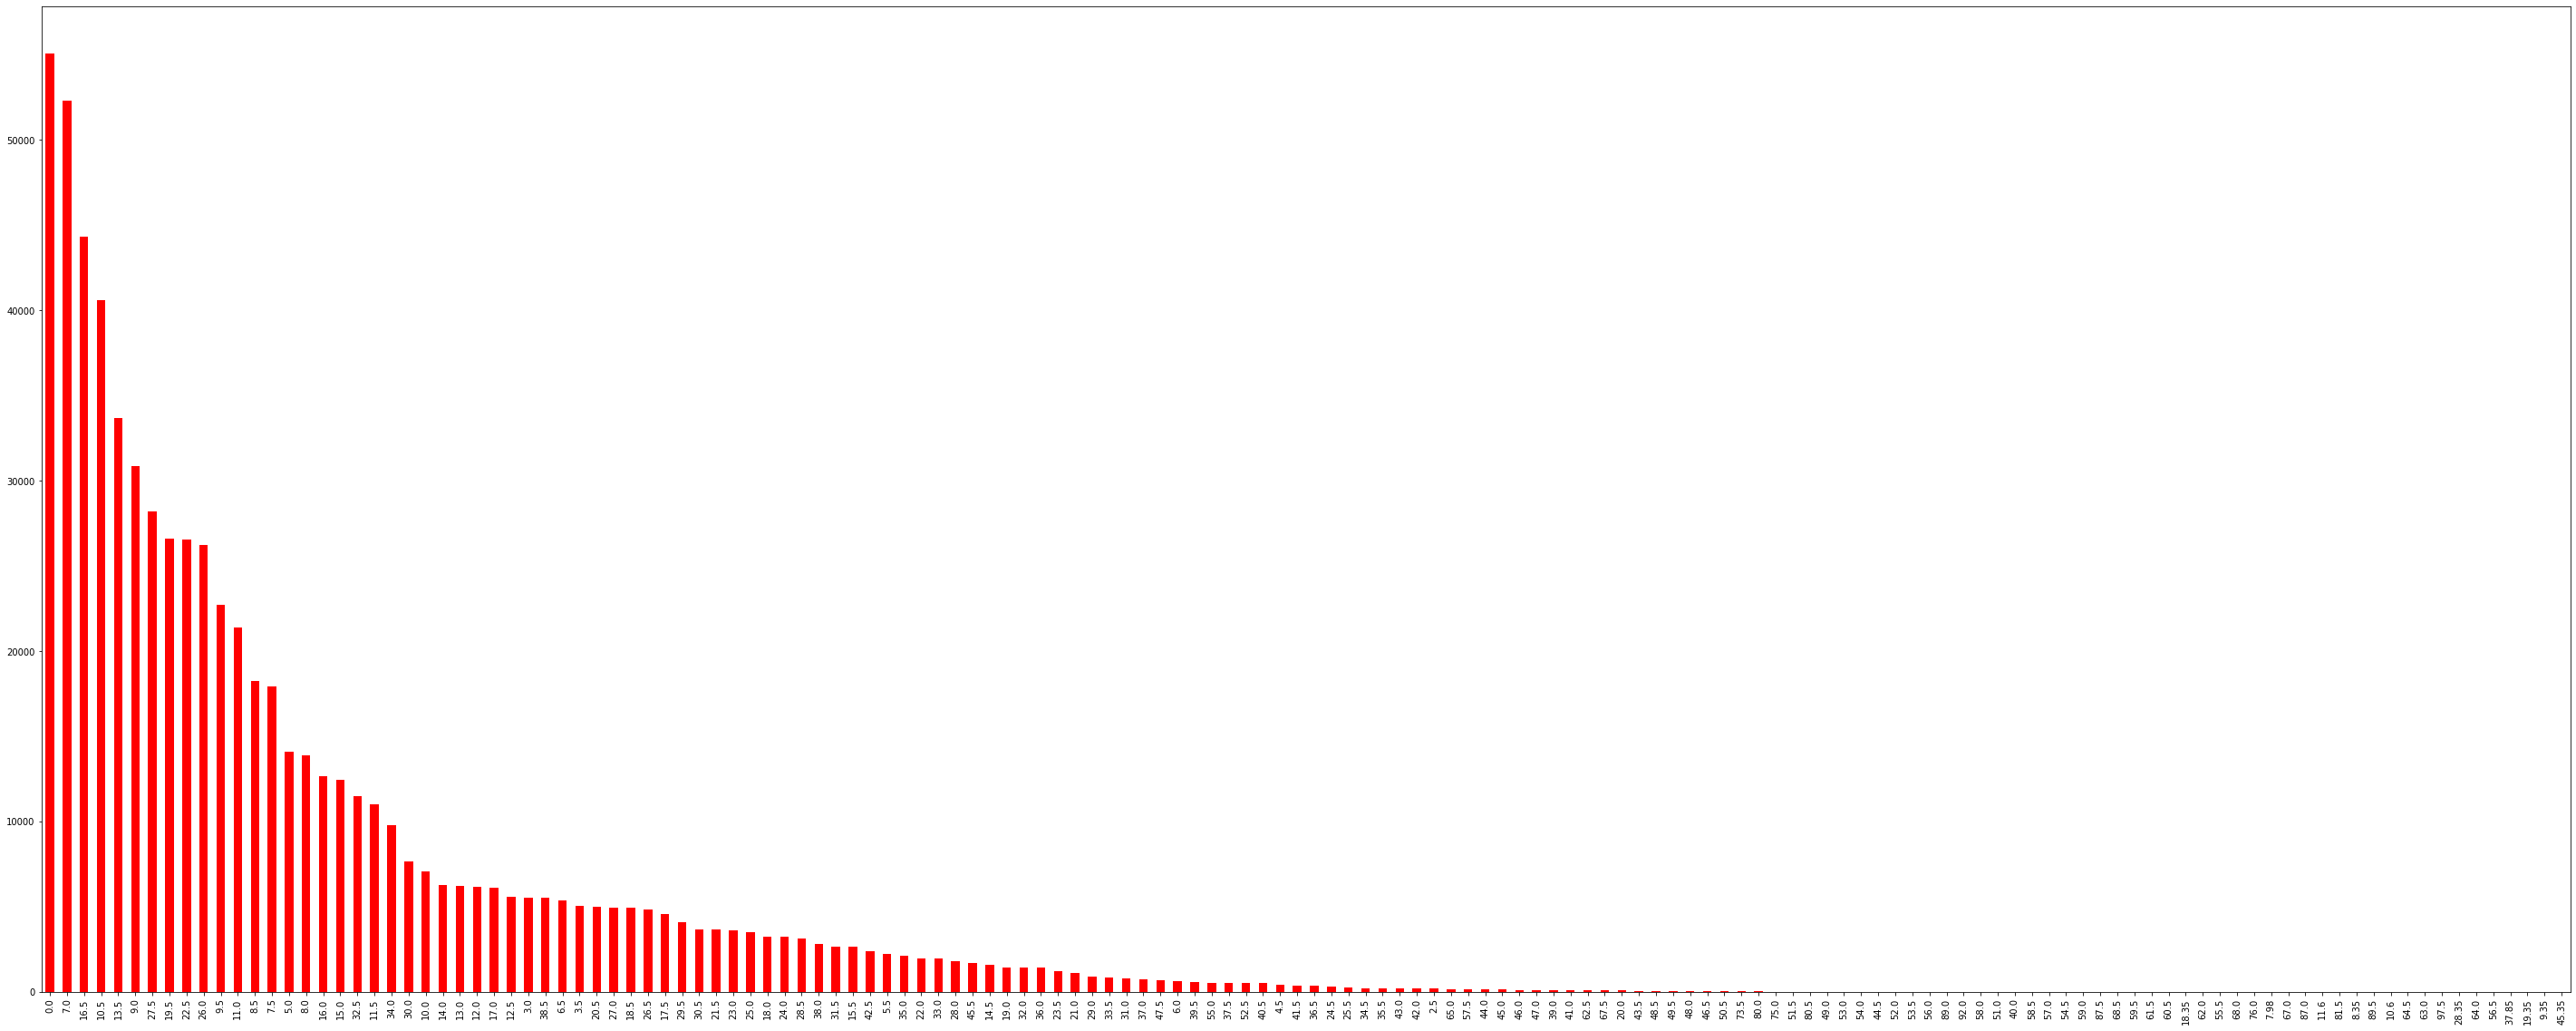

In [271]:
a['price'].value_counts().plot(kind='bar',figsize=(50,20),color='red')

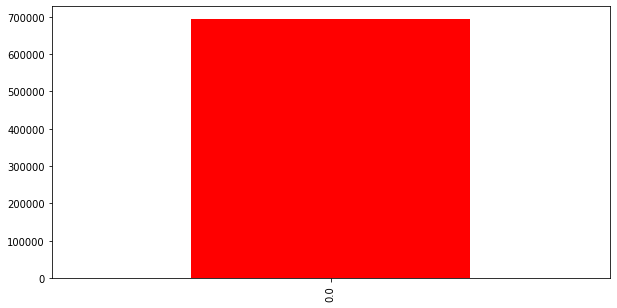

In [272]:
a['Hour'].value_counts().plot(kind='bar',figsize=(10,5),color='red')

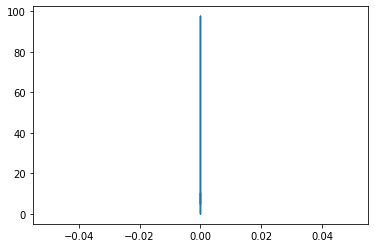

In [273]:
x=a['Hour']
y=a['price']
plt.plot(x,y)
plt.show()

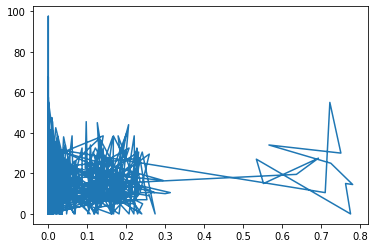

In [274]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [275]:
#we can see that as rain increase price decrease
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'dateTime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'time_stamp', 'humidity',
       'wind', 'date_Time', 'day', 'Hour'],
      dtype='object')

In [276]:
x=a[['distance', 'surge_multiplier',  'temp',
        'clouds', 'pressure', 'rain',  'humidity',
       'wind',  'day', 'Hour']]
y=a['price']


In [277]:
x.head()

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,Hour
0,0.44,1.0,42.42,1.0,1012.14,0.1228,0.77,11.25,1.0,0.0
1,0.44,1.0,42.43,1.0,1012.15,0.1846,0.76,11.32,1.0,0.0
2,0.44,1.0,42.50,1.0,1012.15,0.1089,0.76,11.07,1.0,0.0
3,0.44,1.0,42.11,1.0,1012.13,0.0969,0.77,11.09,1.0,0.0
4,0.44,1.0,43.13,1.0,1012.14,0.1786,0.75,11.49,1.0,0.0


In [278]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [312]:
linear=LinearRegression()# use shift tab tab to see the parameters
linear.fit(x_train,y_train)

LinearRegression()


In [298]:
prediction=linear.predict(x_test)
prediction

array([14.12968338, 14.33317283, 12.7561296 , ..., 17.30920604,
       13.67183212, 11.81917937])

In [281]:
df=pd.DataFrame({'Actual': y_test,'predicted': prediction})
df

,Actual,predicted
441132,8.0,14.129683
274010,13.5,14.333173
532981,0.0,12.756130
428480,0.0,11.636938
194181,13.5,12.450895
...,...,...
68070,29.5,16.113706
229938,34.0,17.538132
144490,11.0,17.309206
260429,0.0,13.671832


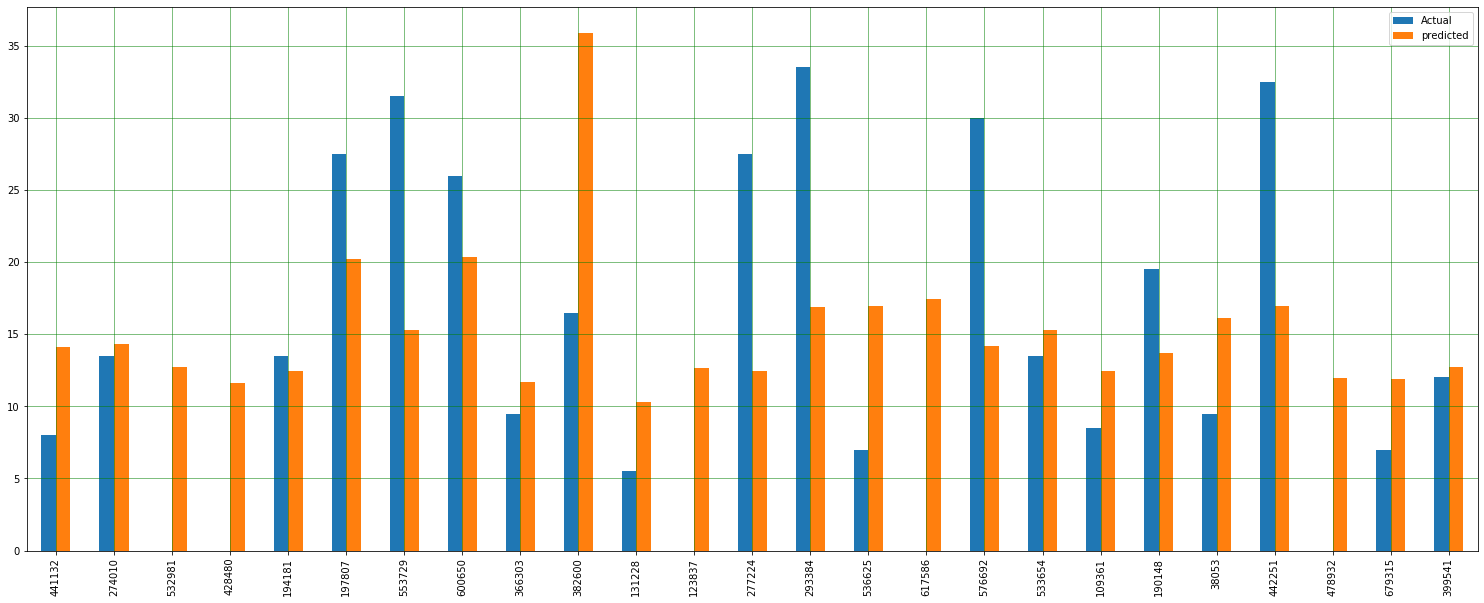

In [282]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='red')
plt.show()

In [285]:
print(metrics.mean_absolute_error(prediction, y_test))
print(metrics.mean_squared_error(prediction, y_test))
print(np.sqrt(metrics.mean_squared_error(prediction, y_test)))

7.47140956850027
85.95483616441727
9.271183104891051


In [308]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.13874712125829247

In [300]:
accuracy = metrics.r2_score(y_test,prediction)
print(accuracy*100,'%')

13.874712125829248 %


In [180]:
# linear regression has low accuracy so we will build another model
x=a[['distance', 'surge_multiplier',  'temp',
        'clouds', 'pressure', 'rain',  'humidity',
       'wind',  'day', 'Hour']]
y=a['price']


In [217]:
x=a[a.product_id=='lyft_line'][['distance', 'surge_multiplier',  'temp',
        'clouds', 'pressure', 'rain',  'humidity',
       'wind',  'day', 'Hour']]

In [218]:
x.head()

,distance,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,Hour
0,0.44,1.0,42.42,1.00,1012.14,0.1228,0.77,11.25,1.0,0.0
8,1.08,1.0,42.07,1.00,1012.12,0.1020,0.78,11.28,1.0,0.0
22,0.72,1.0,41.89,0.81,991.64,0.0000,0.74,10.88,1.0,0.0
32,3.24,1.0,39.10,0.83,996.10,0.0000,0.67,10.66,1.0,0.0
44,1.76,1.0,26.93,0.16,1033.40,0.0000,0.81,2.94,1.0,0.0


In [219]:
x.reset_index(inplace=True)
x = x.drop(columns=['index'])

In [223]:
x.count()

distance            51233
surge_multiplier    51233
temp                51233
clouds              51233
pressure            51233
rain                51233
humidity            51233
wind                51233
day                 51233
Hour                51233
dtype: int64

In [224]:
y = a[a.product_id=='lyft_line']['price'] 

In [225]:
y.count()

51233

In [226]:
features = pd.get_dummies(x)

In [227]:
features.columns

Index(['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 'rain',
       'humidity', 'wind', 'day', 'Hour'],
      dtype='object')

In [228]:
# Use numpy to convert to arrays
#import numpy as np
# Labels are the values we want to predict
labels = np.array(y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [229]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [230]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (38424, 10)
Training Labels Shape: (38424,)
Testing Features Shape: (12809, 10)
Testing Labels Shape: (12809,)


In [231]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [232]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.11 degrees.


In [234]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.63 %.
